In [43]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# EXTERNAL VALIDATION OVER DEFINITIVOS

In [44]:
path = '/home/mr1142/Documents/Data/global_pneumonia_selection/val'
real = pd.read_csv(os.path.join(path, 'results_comparation.csv'))

In [45]:
prueba = [i for i in real.index if bool(re.search('prueba', real.name[i]))]
completo = [i for i in real.index if bool(re.search('prueba', real.name[i]))]
definitivo = [i for i in real.index if bool(re.search('DEFINITIVO', real.name[i]))]

In [46]:
real = real.iloc[definitivo]

## Extraer variables

In [47]:
real['fine'] = [int(re.split('_', real.name[i])[-4][-2:])/10 for i in real.index]
real['fine'] = [1 if real.fine[i] == 0 else real.fine[i] for i in real.index]
real['lr'] = [re.split('_', real.name[i])[-2][3:] for i in real.index]
real['lr'] = [1e-5 if real.lr[i] == '-05' else float('0.' + real.lr[i]) for i in real.index]
real['auc_internal'] = [float(real.name[i][-2:])/100 for i in real.index]

In [48]:
real['mask'] = [1 if bool(re.search('mask', real.name[i])) else 0 for i in real.index]
real['modelo'] = ['EffNet' if bool(re.search('EffNet', real.name[i])) else 'Xception' if bool(re.search('Xception', real.name[i])) else 'IncResNet' for i in real.index]
real['layer'] = [1 if bool(re.search('layer', real.name[i])) else 0 for i in real.index]

In [49]:
real.sort_values('auc').transpose()

,1,0
name,DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-...,DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-00...
auc,0.832243,0.903657
younden,0.747611,0.513026
pr_max,0.037177,0.40275
pr_cut,0,0
f1_score_younden,0.740324,0.832193
precision_score_younden,0.76134,0.837534
recall_score_younden,0.740552,0.831669
accuracy_score_younden,0.740552,0.831669
f1_score_pr_max,0.695263,0.827922


In [51]:
for name in real.name:
    print(name)

DEFINITIVO_1_05_Xception_fine-05_batch-8_lr-0001_auc-99
DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-0001_auc-99


## Cada modelo

In [37]:
import os
import cv2
import json

In [52]:
model_name = 'DEFINITIVO_2_mask_Xception_fine-04_batch-8_lr-0001_auc-99_external'

In [53]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [54]:
os.listdir(p)

['pred_rec_plot_.png', 'auc_plot_.png', 'pr_re_th_plot_.png']

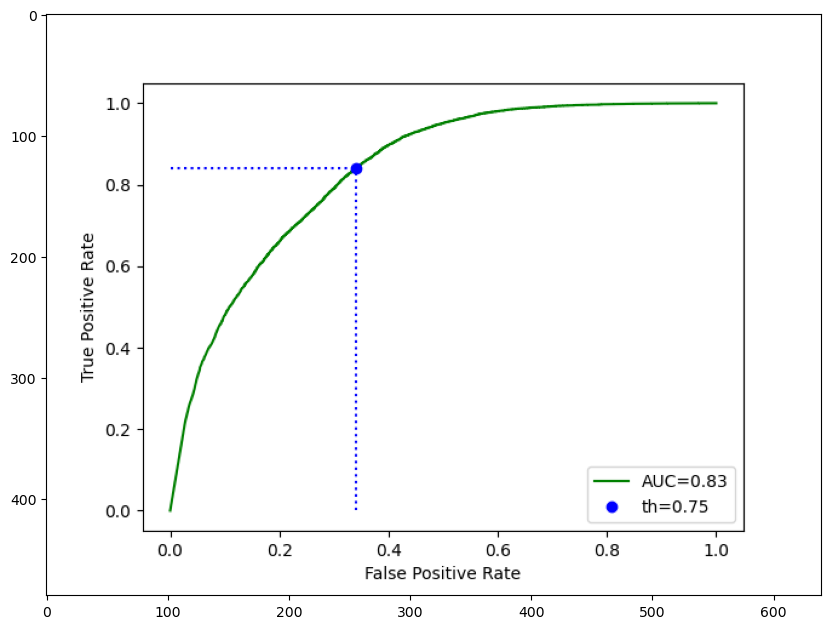

In [55]:
img = cv2.imread(os.path.join(p, 'auc_plot_.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)